<a href="https://colab.research.google.com/github/cagdastopcu/synchronization-models/blob/main/van_der_pol_coupled_oscillators_ct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Phase space for the van der Pol oscillators')

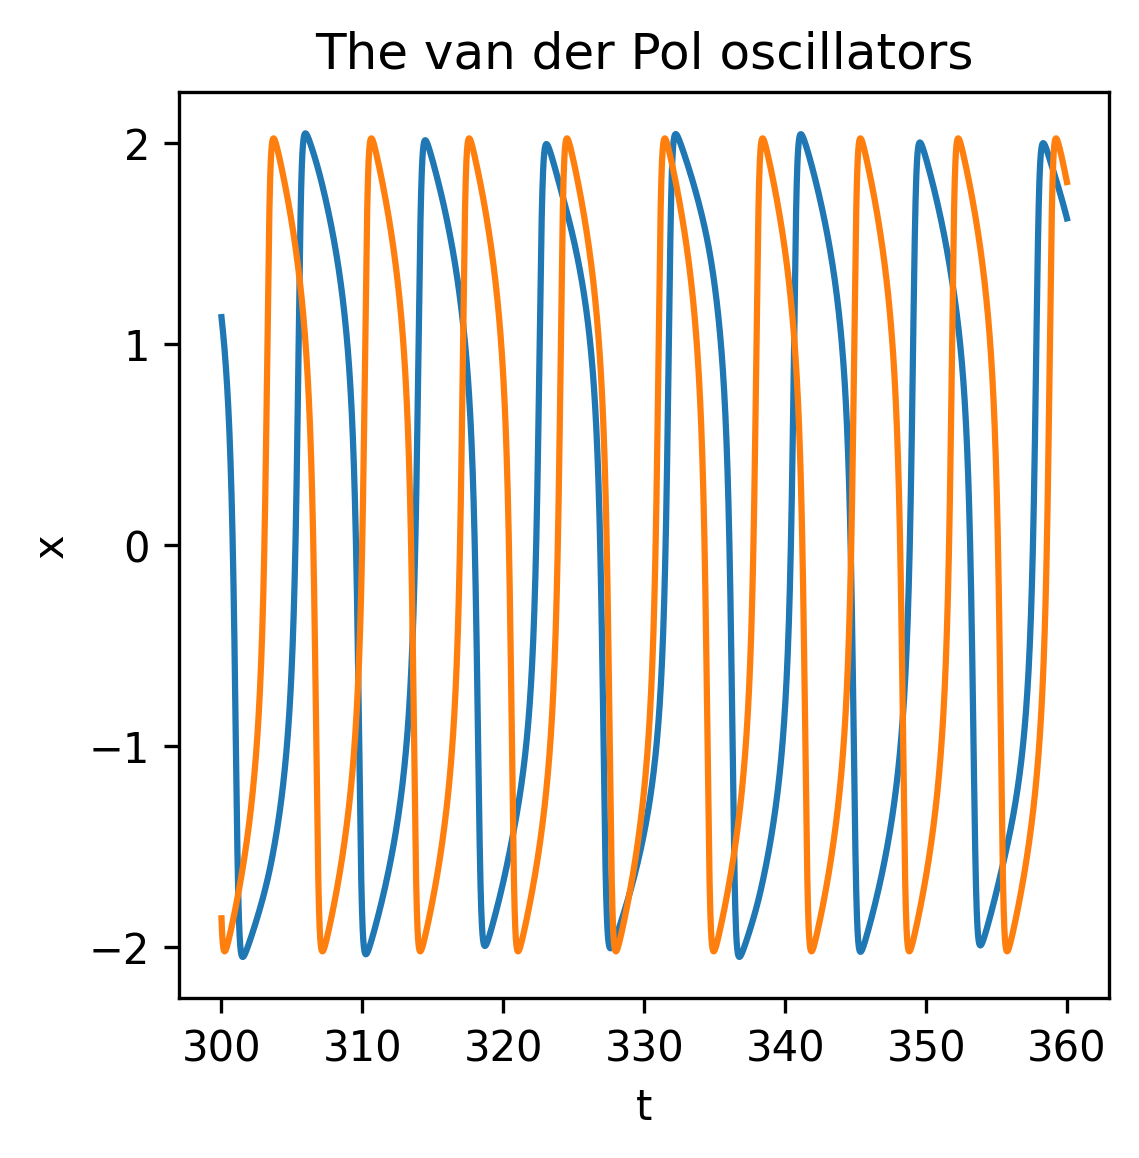

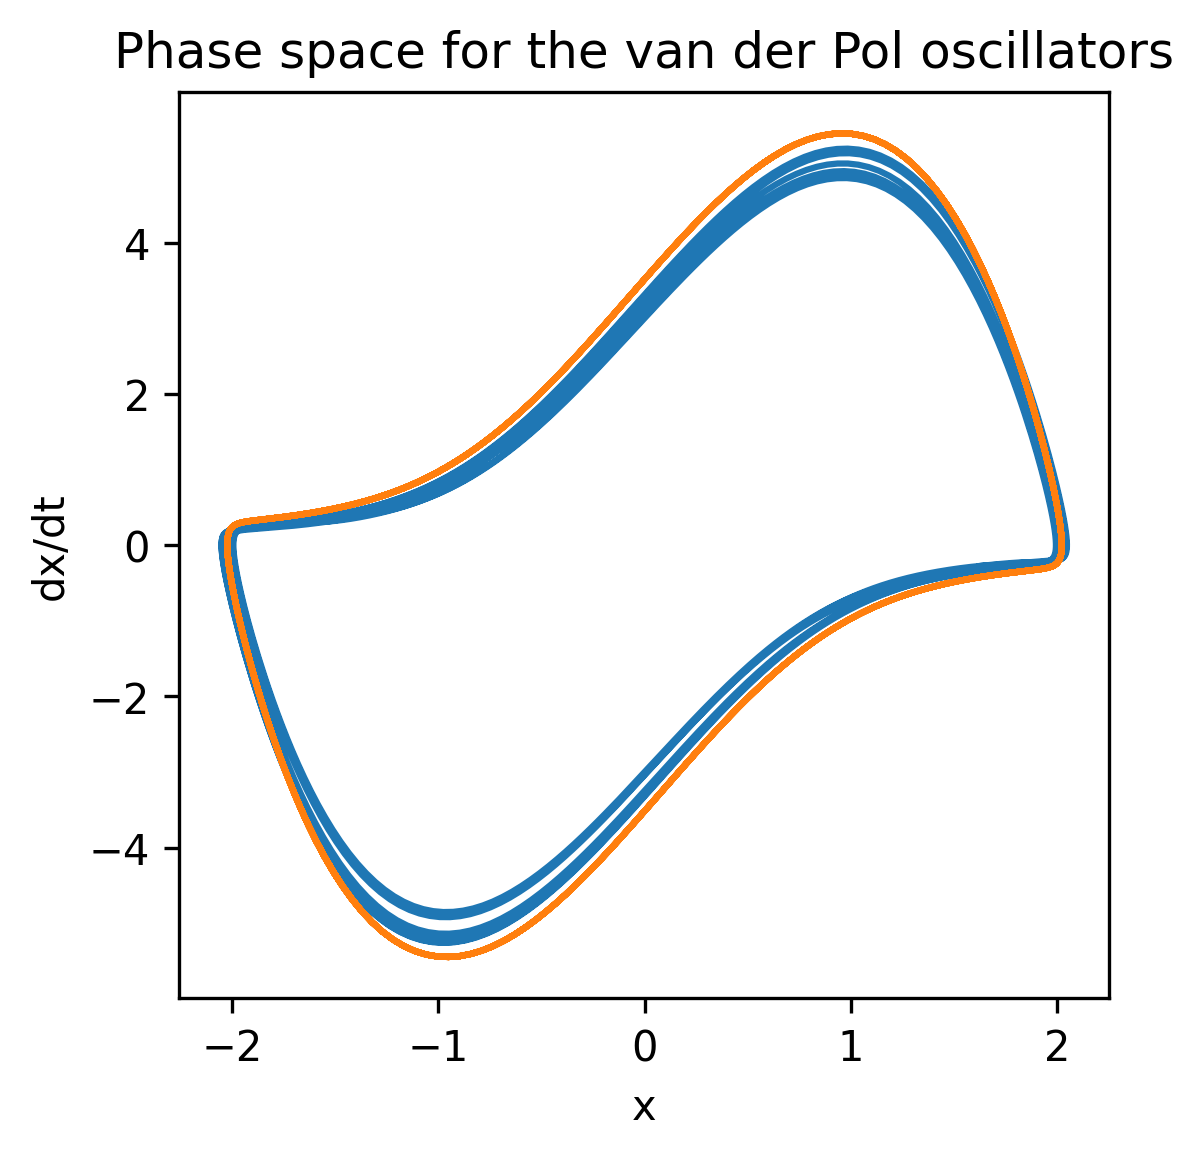

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 23 17:14:47 2020

@author: cagdas
"""

from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
import sys

# %% Van der Pol




def runge_kutta4(func, r, t, h):
    """ 
    Runge-Kutta 4 method for solving 1st order differential equations
    
    Usage: xNew = rk4(func, r, t, h) 
    
    Given a function  f(x, t, h) = dx/dt and initial starting 
    conditions for x, rk4() returns the next values of x. 
    func:  user defined function for the 1st order differential equations
    r: dependent variable(s)
    t: independent variable(s)
    h: independent variable step value
    """
    k1 = h*func(r, t)
    k2 = h*func(r+0.5*k1, t+0.5*h)
    k3 = h*func(r+0.5*k2, t+0.5*h)
    k4 = h*func(r+k3, t+h)
    return (k1 + 2*k2 + 2*k3 + k4)/6

def vanderPolFunction(r, t):
    """ vectorized function for the van der Pol oscillator """
    mu1,omega1 = 3.0,1.0
    mu2,omega2 = 3.1,1.2
    x1 = r[0]
    v1 = r[1]
    x2 = r[2]
    v2 = r[3]
    fx1 = v1
    fv1 = -omega1**2 * x1  +  mu1*(1 - x1**2)*v1 + 0.1*(x2)
    fx2 = v2
    fv2 = -omega2**2 * x2  +  mu2*(1 - x2**2)*v2
    return np.array([fx1,fv1,fx2,fv2], float)

# %% main

# initialiton
step_size = 0.01
#Steps = 10000
nArgs = len(sys.argv)
#if 1 < nArgs < 3 :
    # get nSteps from command line
#    nSteps = int(sys.argv[1])
#elif nArgs > 1:
#    print("\nBad command line input\n")
#    sys.exit("Usage: "+sys.argv[0]+" <nSteps>"+"\n")


tMin,tMax = 0.0,500.0
nSteps = (tMax-tMin)/step_size
tStep = (tMax-tMin)/nSteps

tPoints = np.arange(tMin, tMax, tStep)
x1Points,v1Points = [],[]
x2Points,v2Points = [],[]

# set initial conditions on the state variables
x1_0,v1_0 = 0.5,0.2
x2_0,v2_0 = 0.8,0.4
r = np.array([x1_0,v1_0,x2_0,v2_0], float)

# solve for the time evolution
for t in tPoints:
    x1Points += [r[0]]
    v1Points += [r[1]]
    x2Points += [r[2]]
    v2Points += [r[3]]
    r += runge_kutta4(vanderPolFunction, r, t, tStep)

# plot displacement vs time   
# f = figure(figsize=(10,10), dpi=600)
# %% plots
pl_start,pl_stop = 30000,36000 
fig1 = plt.figure(1,figsize=(4,4), dpi=300)
plt.plot(tPoints[pl_start:pl_stop], x1Points[pl_start:pl_stop])
plt.plot(tPoints[pl_start:pl_stop], x2Points[pl_start:pl_stop])
plt.xlabel("t")
plt.ylabel("x")
plt.title("The van der Pol oscillators")

# plot the phase space
fig2 = plt.figure(2,figsize=(4,4), dpi=300)
plt.plot(x1Points[pl_start:pl_stop], v1Points[pl_start:pl_stop])
plt.plot(x2Points[pl_start:pl_stop], v2Points[pl_start:pl_stop])
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.title("Phase space for the van der Pol oscillators")


# fig1.show()
# fig2.show()
# input("Enter [return] to exit")